In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/refcoco.pth
/kaggle/input/reference.txt
/kaggle/input/dinov2_vitl14_pretrain.pth
/kaggle/input/sam_vit_h_4b8939.pth
/kaggle/input/sample_image.jpg
/kaggle/input/swint_only_sam_many2many.pth
/kaggle/input/Images-20250418T060633Z-001/Images/backpack_dog/01.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/backpack_dog/00.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/clock/01.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/clock/00.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/can/01.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/can/00.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/berry_bowl/01.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/berry_bowl/00.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/candle/01.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/candle/00.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/barn/01.jpg
/kaggle/input/Images-20250418T060633Z-001/Images/barn/00.jpg
/kaggle/input/Images-20250418T06

# 1. CLIP vs CLIPS (Contrastive Language-Image Pretraining)

In [2]:
!pip install ftfy packaging regex tqdm torch torchvision huggingface_hub safetensors timm open_clip_torch # fairscale==0.4.4 pycocoevalcap requests filelock mmcv-full==1.3.12 mmsegmentation pycocotools==2.0.2 opencv-python==4.5.3.56

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.5 MB/s eta 0:00:000:00:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvji

In [3]:
!pip install open_clip_torch

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel, BlipProcessor, BlipForQuestionAnswering, BlipForConditionalGeneration
import torch
from PIL import Image
import requests
from open_clip import create_model_from_pretrained, get_tokenizer
import torch.nn.functional as F
import os

2025-04-20 15:03:59.223501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745161439.462664      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745161439.532021      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [6]:
image_path = "/kaggle/input/sample_image.jpg"
image = Image.open(image_path)

texts = [
    "a person walking with a dog",
    "a man and his pet",
    "a human and canine companion",
    "a person holding a dog lika a baby",
    "a man playing with his dog",
    "a person and dog resting",
    "a human holding a pet",
    "a man and his loyal companion",
    "a person with their furry friend",
    "a human and dog enjoying home time"
]

inputs = clip_processor(text=texts, images=image, return_tensors="pt", padding=True)

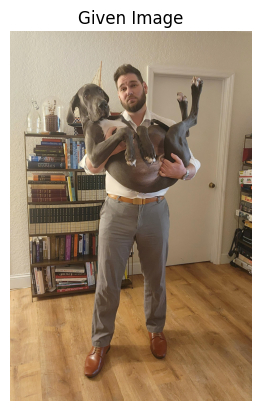

In [7]:
plt.imshow(Image.open(image_path))
plt.axis("off")
plt.title("Given Image")
plt.show()

In [8]:
outputs = clip_model(**inputs)
logits_per_image = outputs.logits_per_image
# probs = logits_per_image.softmax(dim=1)
probs = logits_per_image

In [9]:
print("Similarity scores for each text description:")
for text, prob in zip(texts, probs[0]):
    print(f"{text}: {prob.item():.4f}")

Similarity scores for each text description:
a person walking with a dog: 27.0259
a man and his pet: 29.0035
a human and canine companion: 27.7823
a person holding a dog lika a baby: 27.1600
a man playing with his dog: 29.0925
a person and dog resting: 26.1550
a human holding a pet: 29.5404
a man and his loyal companion: 27.6204
a person with their furry friend: 28.8493
a human and dog enjoying home time: 29.2507


In [10]:
clips_model, clips_processor = create_model_from_pretrained('hf-hub:UCSC-VLAA/ViT-L-14-CLIPS-224-Recap-DataComp-1B')
clips_tokenizer = get_tokenizer('hf-hub:UCSC-VLAA/ViT-L-14-CLIPS-Recap-DataComp-1B')

open_clip_pytorch_model.bin:   0%|          | 0.00/1.66G [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

open_clip_config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [11]:
inputs_2 = clips_processor(image).unsqueeze(0)
text_tokens = clips_tokenizer(texts, context_length=clips_model.context_length)

In [12]:
with torch.no_grad():
    image_features = clips_model.encode_image(inputs_2)
    text_features = clips_model.encode_text(text_tokens)

image_features = F.normalize(image_features, dim=-1)
text_features = F.normalize(text_features, dim=-1)

In [13]:
# text_probs = (100 * image_features @ text_features.T).softmax(dim=-1)
text_probs = (100 * image_features @ text_features.T)

print("CLIPS Similarity scores for each text:")
for text, prob in zip(texts, text_probs[0]):
    print(f"{text}: {prob.item():.4f}")

CLIPS Similarity scores for each text:
a person walking with a dog: 8.3078
a man and his pet: 15.4639
a human and canine companion: 13.9483
a person holding a dog lika a baby: 11.1285
a man playing with his dog: 13.9156
a person and dog resting: 7.2605
a human holding a pet: 13.1432
a man and his loyal companion: 13.7897
a person with their furry friend: 12.7554
a human and dog enjoying home time: 12.4032
